In [1]:
import pandas as pd

df = pd.read_csv("/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/X_train.csv")

print(df.describe())


        Count       Gender          Age     Under 30  Senior Citizen  \
count  5634.0  5634.000000  5634.000000  5634.000000     5634.000000   
mean      1.0     0.507810    46.314874     0.201278        0.159034   
std       0.0     0.499983    16.758174     0.400991        0.365741   
min       1.0     0.000000    19.000000     0.000000        0.000000   
25%       1.0     0.000000    32.000000     0.000000        0.000000   
50%       1.0     1.000000    46.000000     0.000000        0.000000   
75%       1.0     1.000000    59.000000     0.000000        0.000000   
max       1.0     1.000000    80.000000     1.000000        1.000000   

           Married   Dependents  Number of Dependents         City  \
count  5634.000000  5634.000000           5634.000000  5634.000000   
mean      0.482073     0.229499              0.465389   584.491303   
std       0.499723     0.420548              0.965015   307.438668   
min       0.000000     0.000000              0.000000     0.000000   
2

### Observations from Numerical Feature Statistics

Based on the output of `df.describe()`, several observations can be made about the numerical features in the dataset:

1. **Extreme Values (max/min):**  
   The maximum value of `Lifetime_Value_per_Month` is 5980, which seems unusually high. This will be further investigated to determine whether it is a valid value or an outlier.

2. **Distribution Anomalies:**  
   Features such as `Refund_to_Charges_Ratio` and `Extra_Data_Usage_Cost_Proportion` have relatively large standard deviations, suggesting the presence of potential outliers that might influence the analysis or modeling results.

3. **Binary Features:**  
   Features like `Gender` and `Senior Citizen` have value ranges of 0 and 1. Since they represent categorical data, they will not require outlier detection or additional preprocessing.

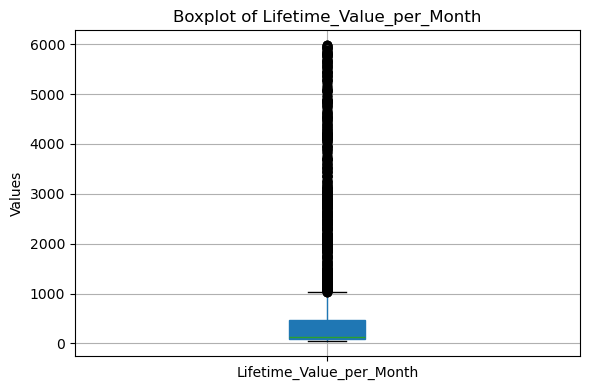

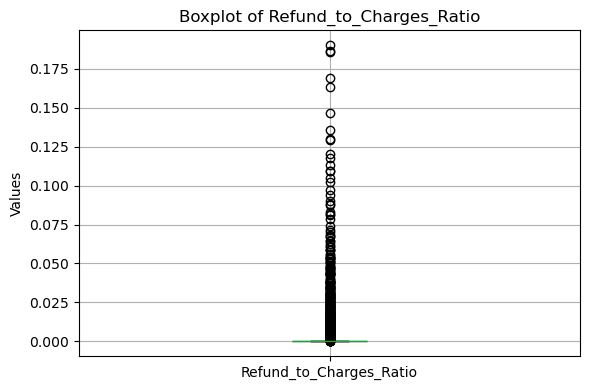

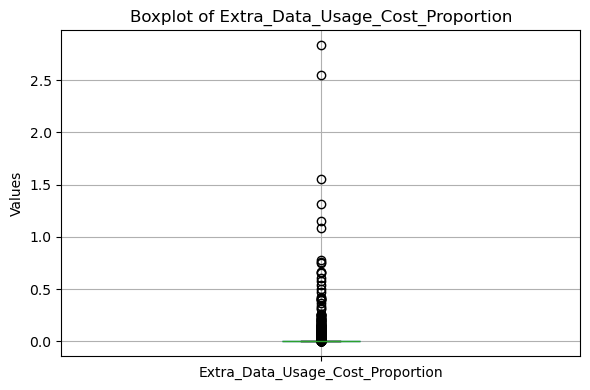

In [3]:
import matplotlib.pyplot as plt

X_train = pd.read_csv("/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/X_train.csv")

# List of features to plot
selected_features = ['Lifetime_Value_per_Month','Refund_to_Charges_Ratio','Extra_Data_Usage_Cost_Proportion']

# Plot each feature separately
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    X_train.boxplot(column=[feature], showfliers=True, patch_artist=True)
    plt.title(f"Boxplot of {feature}")
    plt.ylabel("Values")
    plt.tight_layout()
    plt.show()

## Outliers Removal

### Outlier Removal for `Lifetime_Value_per_Month`

In [6]:
import pandas as pd

# Load the datasets
X_train = pd.read_csv('/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/X_train.csv')
y_train = pd.read_csv('/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/y_train.csv')

# Calculate IQR for 'Lifetime_Value_per_Month'
Q1_lvm = X_train['Lifetime_Value_per_Month'].quantile(0.25)
Q3_lvm = X_train['Lifetime_Value_per_Month'].quantile(0.75)
IQR_lvm = Q3_lvm - Q1_lvm

# Define bounds for outlier detection
lower_bound_lvm = Q1_lvm - 1.5 * IQR_lvm
upper_bound_lvm = Q3_lvm + 1.5 * IQR_lvm

# Remove outliers
X_train_no_outliers_lvm = X_train[(X_train['Lifetime_Value_per_Month'] >= lower_bound_lvm) &
                                  (X_train['Lifetime_Value_per_Month'] <= upper_bound_lvm)]

# Ensure y_train aligns with the filtered X_train
y_train_filtered = y_train.loc[X_train_no_outliers_lvm.index]

# Save the new dataset without outliers
output_file_lvm = '/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/X_train_no_outliers_lifetime_value_per_month.csv'
X_train_no_outliers_lvm.to_csv(output_file_lvm, index=False)
y_train_filtered.to_csv('/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/y_train_no_outliers_lifetime_value_per_month.csv', index=False)

# Summary of differences
original_size_lvm = X_train.shape[0]
cleaned_size_lvm = X_train_no_outliers_lvm.shape[0]
removed_count_lvm = original_size_lvm - cleaned_size_lvm

print("Summary for Lifetime_Value_per_Month:")
print(f"Original Dataset Rows: {original_size_lvm}")
print(f"Cleaned Dataset Rows: {cleaned_size_lvm}")
print(f"Outliers Removed: {removed_count_lvm}")
print(f"Percentage Removed: {removed_count_lvm / original_size_lvm * 100:.2f}%")


Summary for Lifetime_Value_per_Month:
Original Dataset Rows: 5634
Cleaned Dataset Rows: 4750
Outliers Removed: 884
Percentage Removed: 15.69%


- The cleaned dataset was saved as:`X_train_no_outliers_lifetime_value_per_month.csv`、`y_train_no_outliers_lifetime_value_per_month.csv`

### Outlier Removal for `Refund_to_Charges_Ratio`
- Outliers were identified and removed based on the lower and upper bounds calculated using the IQR.

In [9]:
import pandas as pd

# Load the datasets
X_train = pd.read_csv('/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/X_train.csv')
y_train = pd.read_csv('/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/y_train.csv')

# Calculate IQR for 'Refund_to_Charges_Ratio'
Q1_rcr = X_train['Refund_to_Charges_Ratio'].quantile(0.25)
Q3_rcr = X_train['Refund_to_Charges_Ratio'].quantile(0.75)
IQR_rcr = Q3_rcr - Q1_rcr

# Define bounds for outlier detection
lower_bound_rcr = Q1_rcr - 1.5 * IQR_rcr
upper_bound_rcr = Q3_rcr + 1.5 * IQR_rcr

# Remove outliers
X_train_no_outliers_rcr = X_train[(X_train['Refund_to_Charges_Ratio'] >= lower_bound_rcr) &
                                  (X_train['Refund_to_Charges_Ratio'] <= upper_bound_rcr)]

# Ensure y_train aligns with the filtered X_train
y_train_filtered = y_train.loc[X_train_no_outliers_rcr.index]

# Save the new dataset without outliers
output_file_rcr = '/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/X_train_no_outliers_refund_to_charges_ratio.csv'
X_train_no_outliers_rcr.to_csv(output_file_rcr, index=False)
y_train_filtered.to_csv('/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/y_train_no_outliers_refund_to_charges_ratio.csv', index=False)

# Summary of differences
original_size_rcr = X_train.shape[0]
cleaned_size_rcr = X_train_no_outliers_rcr.shape[0]
removed_count_rcr = original_size_rcr - cleaned_size_rcr

print("Summary for Refund_to_Charges_Ratio:")
print(f"Original Dataset Rows: {original_size_rcr}")
print(f"Cleaned Dataset Rows: {cleaned_size_rcr}")
print(f"Outliers Removed: {removed_count_rcr}")
print(f"Percentage Removed: {removed_count_rcr / original_size_rcr * 100:.2f}%")


Summary for Refund_to_Charges_Ratio:
Original Dataset Rows: 5634
Cleaned Dataset Rows: 5210
Outliers Removed: 424
Percentage Removed: 7.53%


### Outlier Removal for `Extra_Data_Usage_Cost_Proportion`
- Outliers were identified and removed based on the lower and upper bounds calculated using the IQR.

In [11]:
import pandas as pd

# Load the datasets
X_train = pd.read_csv('/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/X_train.csv')
y_train = pd.read_csv('/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/y_train.csv')

# Calculate IQR for 'Extra_Data_Usage_Cost_Proportion'
Q1_edp = X_train['Extra_Data_Usage_Cost_Proportion'].quantile(0.25)
Q3_edp = X_train['Extra_Data_Usage_Cost_Proportion'].quantile(0.75)
IQR_edp = Q3_edp - Q1_edp

# Define bounds for outlier detection
lower_bound_edp = Q1_edp - 1.5 * IQR_edp
upper_bound_edp = Q3_edp + 1.5 * IQR_edp

# Remove outliers
X_train_no_outliers_edp = X_train[(X_train['Extra_Data_Usage_Cost_Proportion'] >= lower_bound_edp) &
                                  (X_train['Extra_Data_Usage_Cost_Proportion'] <= upper_bound_edp)]

# Ensure y_train aligns with the filtered X_train
y_train_filtered = y_train.loc[X_train_no_outliers_edp.index]

# Save the new dataset without outliers
output_file_edp = '/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/X_train_no_outliers_extra_data_usage_cost_proportion.csv'
X_train_no_outliers_edp.to_csv(output_file_edp, index=False)
y_train_filtered.to_csv('/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/y_train_no_outliers_extra_data_usage_cost_proportion.csv', index=False)

# Summary of differences
original_size_edp = X_train.shape[0]
cleaned_size_edp = X_train_no_outliers_edp.shape[0]
removed_count_edp = original_size_edp - cleaned_size_edp

print("Summary for Extra_Data_Usage_Cost_Proportion:")
print(f"Original Dataset Rows: {original_size_edp}")
print(f"Cleaned Dataset Rows: {cleaned_size_edp}")
print(f"Outliers Removed: {removed_count_edp}")
print(f"Percentage Removed: {removed_count_edp / original_size_edp * 100:.2f}%")


Summary for Extra_Data_Usage_Cost_Proportion:
Original Dataset Rows: 5634
Cleaned Dataset Rows: 5044
Outliers Removed: 590
Percentage Removed: 10.47%


- The cleaned dataset was saved as:`X_train_no_outliers_extra_data_usage_cost_proportion.csv`、`y_train_no_outliers_extra_data_usage_cost_proportion.csv`

### Outlier Removal for `Lifetime_Value_per_Month`, `Refund_to_Charges_Ratio`, and `Extra_Data_Usage_Cost_Proportion`
- Outliers were identified and removed based on the lower and upper bounds calculated using the IQR.

In [14]:
import pandas as pd

# Load the datasets
X_train = pd.read_csv('/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/X_train.csv')
y_train = pd.read_csv('/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/y_train.csv')

# --- 1. Lifetime_Value_per_Month ---
Q1_lvm = X_train['Lifetime_Value_per_Month'].quantile(0.25)
Q3_lvm = X_train['Lifetime_Value_per_Month'].quantile(0.75)
IQR_lvm = Q3_lvm - Q1_lvm
lower_bound_lvm = Q1_lvm - 1.5 * IQR_lvm
upper_bound_lvm = Q3_lvm + 1.5 * IQR_lvm

# --- 2. Refund_to_Charges_Ratio ---
Q1_rcr = X_train['Refund_to_Charges_Ratio'].quantile(0.25)
Q3_rcr = X_train['Refund_to_Charges_Ratio'].quantile(0.75)
IQR_rcr = Q3_rcr - Q1_rcr
lower_bound_rcr = Q1_rcr - 1.5 * IQR_rcr
upper_bound_rcr = Q3_rcr + 1.5 * IQR_rcr

# --- 3. Extra_Data_Usage_Cost_Proportion ---
Q1_edp = X_train['Extra_Data_Usage_Cost_Proportion'].quantile(0.25)
Q3_edp = X_train['Extra_Data_Usage_Cost_Proportion'].quantile(0.75)
IQR_edp = Q3_edp - Q1_edp
lower_bound_edp = Q1_edp - 1.5 * IQR_edp
upper_bound_edp = Q3_edp + 1.5 * IQR_edp

# Remove outliers for all relevant features
X_train_no_outliers = X_train[
    (X_train['Lifetime_Value_per_Month'] >= lower_bound_lvm) &
    (X_train['Lifetime_Value_per_Month'] <= upper_bound_lvm) &
    (X_train['Refund_to_Charges_Ratio'] >= lower_bound_rcr) &
    (X_train['Refund_to_Charges_Ratio'] <= upper_bound_rcr) &
    (X_train['Extra_Data_Usage_Cost_Proportion'] >= lower_bound_edp) &
    (X_train['Extra_Data_Usage_Cost_Proportion'] <= upper_bound_edp)
]

# Ensure y_train aligns with the filtered X_train
y_train_filtered = y_train.loc[X_train_no_outliers.index]

# Save the cleaned datasets
X_train_no_outliers.to_csv('/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/X_train_no_outliers_combined.csv', index=False)
y_train_filtered.to_csv('/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/y_train_no_outliers_combined.csv', index=False)

# Summary of changes
original_size = X_train.shape[0]
cleaned_size = X_train_no_outliers.shape[0]
removed_count = original_size - cleaned_size

print("Summary for Combined Features:")
print(f"Original Dataset Rows: {original_size}")
print(f"Cleaned Dataset Rows: {cleaned_size}")
print(f"Outliers Removed: {removed_count}")
print(f"Percentage Removed: {removed_count / original_size * 100:.2f}%")


Summary for Combined Features:
Original Dataset Rows: 5634
Cleaned Dataset Rows: 3885
Outliers Removed: 1749
Percentage Removed: 31.04%


- The cleaned dataset was saved as:`X_train_no_outliers_combined.csv`、`y_train_no_outliers_combined.csv`